

## Introduccion a la exploración de datos de proceso con R
Juan Riera
16/9/2021

### Práctica 2 - Proceso de dosificación y control de peso medio en envasado.
Antes de comenzar a usar el cuaderno, recuerda guardar una copia en tu carpeta de Google Drive. Para ello, vete a Archivo/Guardar una copia en Drive y guárdalo. Una vez guardada la copia, ya puedes empezar a utilizarla.

Para trabajar con el cuaderno, es necesario subir nuestro fichero de datos `peso.txt` al espacio de Google Colab, utilizando la barra lateral. 



In [ ]:
# esta opción ajusta el tamaño de los gráficos en el entorno Jupyter
options(repr.plot.width=8, repr.plot.height=5)

In [ ]:
library(tidyverse)
library(ggplot2)
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Preparación de los datos: importando un nuevo formato de fichero de texto

In [ ]:
df <- read.table("peso.txt")
head(df)

,V1,V2,V3
,<chr>,<chr>,<chr>
1,2020-05-16,09:00:00,"254,55"
2,2020-05-16,09:00:10,"246,92"
3,2020-05-16,09:00:20,"236,29"
4,2020-05-16,09:00:30,"241,6"
5,2020-05-16,09:00:40,"247,41"
6,2020-05-16,09:00:50,"243,03"


In [ ]:
str(df)

'data.frame':	3000 obs. of  3 variables:
 $ V1: chr  "2020-05-16" "2020-05-16" "2020-05-16" "2020-05-16" ...
 $ V2: chr  "09:00:00" "09:00:10" "09:00:20" "09:00:30" ...
 $ V3: chr  "254,55" "246,92" "236,29" "241,6" ...


In [ ]:
df <- read.table("peso.txt", dec = ",")
head(df)

,V1,V2,V3
,<chr>,<chr>,<dbl>
1,2020-05-16,09:00:00,254.55
2,2020-05-16,09:00:10,246.92
3,2020-05-16,09:00:20,236.29
4,2020-05-16,09:00:30,241.60
5,2020-05-16,09:00:40,247.41
6,2020-05-16,09:00:50,243.03


In [ ]:
str(df)

'data.frame':	3000 obs. of  3 variables:
 $ V1: chr  "2020-05-16" "2020-05-16" "2020-05-16" "2020-05-16" ...
 $ V2: chr  "09:00:00" "09:00:10" "09:00:20" "09:00:30" ...
 $ V3: num  255 247 236 242 247 ...


In [ ]:
df <- read.table("peso.txt") # leemos la tabla sin corregir formato

df$V3 <- sub(",", ".", df$V3) # sustituimos las comas por puntos
str(df)

'data.frame':	3000 obs. of  3 variables:
 $ V1: chr  "2020-05-16" "2020-05-16" "2020-05-16" "2020-05-16" ...
 $ V2: chr  "09:00:00" "09:00:10" "09:00:20" "09:00:30" ...
 $ V3: chr  "254.55" "246.92" "236.29" "241.6" ...


In [ ]:
df$V3 <- as.numeric(df$V3) # convertimos la columna a numérica
str(df)

'data.frame':	3000 obs. of  3 variables:
 $ V1: chr  "2020-05-16" "2020-05-16" "2020-05-16" "2020-05-16" ...
 $ V2: chr  "09:00:00" "09:00:10" "09:00:20" "09:00:30" ...
 $ V3: num  255 247 236 242 247 ...


In [ ]:
df$fecha <- paste(df$V1, "", df$V2)
str(df)

'data.frame':	3000 obs. of  4 variables:
 $ V1   : chr  "2020-05-16" "2020-05-16" "2020-05-16" "2020-05-16" ...
 $ V2   : chr  "09:00:00" "09:00:10" "09:00:20" "09:00:30" ...
 $ V3   : num  255 247 236 242 247 ...
 $ fecha: chr  "2020-05-16  09:00:00" "2020-05-16  09:00:10" "2020-05-16  09:00:20" "2020-05-16  09:00:30" ...


In [ ]:
df$fecha <- as.POSIXct(df$fecha, tz = "GMT", format = "%Y-%m-%d %H:%M")
str(df)

'data.frame':	3000 obs. of  4 variables:
 $ V1   : chr  "2020-05-16" "2020-05-16" "2020-05-16" "2020-05-16" ...
 $ V2   : chr  "09:00:00" "09:00:10" "09:00:20" "09:00:30" ...
 $ V3   : num  255 247 236 242 247 ...
 $ fecha: POSIXct, format: "2020-05-16 09:00:00" "2020-05-16 09:00:00" ...


In [ ]:
library(tidyverse)
df <- select(df, -c(V1,V2))

In [ ]:
df <- rename(df, peso = V3)
head(df)

,peso,fecha
,<dbl>,<dttm>
1,254.55,2020-05-16 09:00:00
2,246.92,2020-05-16 09:00:00
3,236.29,2020-05-16 09:00:00
4,241.60,2020-05-16 09:00:00
5,247.41,2020-05-16 09:00:00
6,243.03,2020-05-16 09:00:00


In [ ]:
df <- read.table("peso.txt", dec = ",")
df$fecha <- paste(df$V1, "", df$V2)
df$fecha <- as.POSIXct(df$fecha, tz = "GMT", format = "%Y-%m-%d %H:%M")
df <- select(df, -c(V1,V2))
df <- rename(df, peso = V3)
head(df)

,peso,fecha
,<dbl>,<dttm>
1,254.55,2020-05-16 09:00:00
2,246.92,2020-05-16 09:00:00
3,236.29,2020-05-16 09:00:00
4,241.60,2020-05-16 09:00:00
5,247.41,2020-05-16 09:00:00
6,243.03,2020-05-16 09:00:00


In [ ]:
df <- read.table("peso.txt", dec = ",") |>
  mutate (fecha = paste(V1, "", V2)) |>
  mutate (fecha = as.POSIXct(fecha, tz = "GMT", format = "%Y-%m-%d %H:%M")) |>
  select(-c(V1,V2)) |>
  rename(peso = V3)

head(df)

,peso,fecha
,<dbl>,<dttm>
1,254.55,2020-05-16 09:00:00
2,246.92,2020-05-16 09:00:00
3,236.29,2020-05-16 09:00:00
4,241.60,2020-05-16 09:00:00
5,247.41,2020-05-16 09:00:00
6,243.03,2020-05-16 09:00:00


In [ ]:
ggplot(df, aes(x=factor(month(fecha)), y=hrel)) +
  geom_boxplot() +
  xlab("Mes") +
  ylab("Humedad relativa %")

## Análisis de los datos de peso

In [ ]:
summary(df)

      peso           fecha                    
 Min.   :223.6   Min.   :2020-05-16 09:00:00  
 1st Qu.:244.5   1st Qu.:2020-05-16 11:04:45  
 Median :250.1   Median :2020-05-16 13:09:30  
 Mean   :250.0   Mean   :2020-05-16 13:09:30  
 3rd Qu.:255.5   3rd Qu.:2020-05-16 15:14:15  
 Max.   :279.4   Max.   :2020-05-16 17:19:00  

In [ ]:
sd(df$peso)

[1] 8.147409

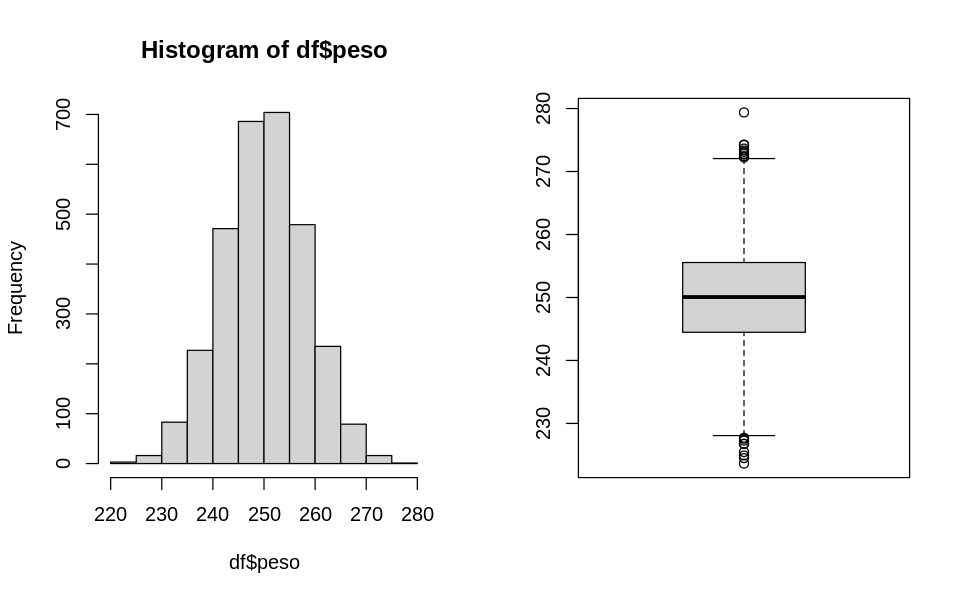

In [ ]:
par(mfrow=c(1,2))
hist(df$peso)
boxplot(df$peso)

In [ ]:
v <- c(11, 3, 5, 15, 23, 7, 13)

In [ ]:
v < 10

[1] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE

In [ ]:
sum(v<10)

[1] 3

In [ ]:
muestra <- sample(df$peso, 100)

In [ ]:
sum(muestra < 232)

[1] 0

In [ ]:
sum(muestra < 241)

[1] 13

## El trabajo de mejora

### Cómo determinamos los límites de tolerancia de un proceso

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



List of 11
 $ call      : language qcc(data = df$peso, type = "xbar.one")
 $ type      : chr "xbar.one"
 $ data.name : chr "df$peso"
 $ data      : num [1:3000, 1] 255 247 236 242 247 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics: Named num [1:3000] 255 247 236 242 247 ...
  ..- attr(*, "names")= chr [1:3000] "1" "2" "3" "4" ...
 $ sizes     : int [1:3000] 1 1 1 1 1 1 1 1 1 1 ...
 $ center    : num 250
 $ std.dev   : num 8.06
 $ nsigmas   : num 3
 $ limits    : num [1, 1:2] 226 274
  ..- attr(*, "dimnames")=List of 2
 $ violations:List of 2
 - attr(*, "class")= chr "qcc"

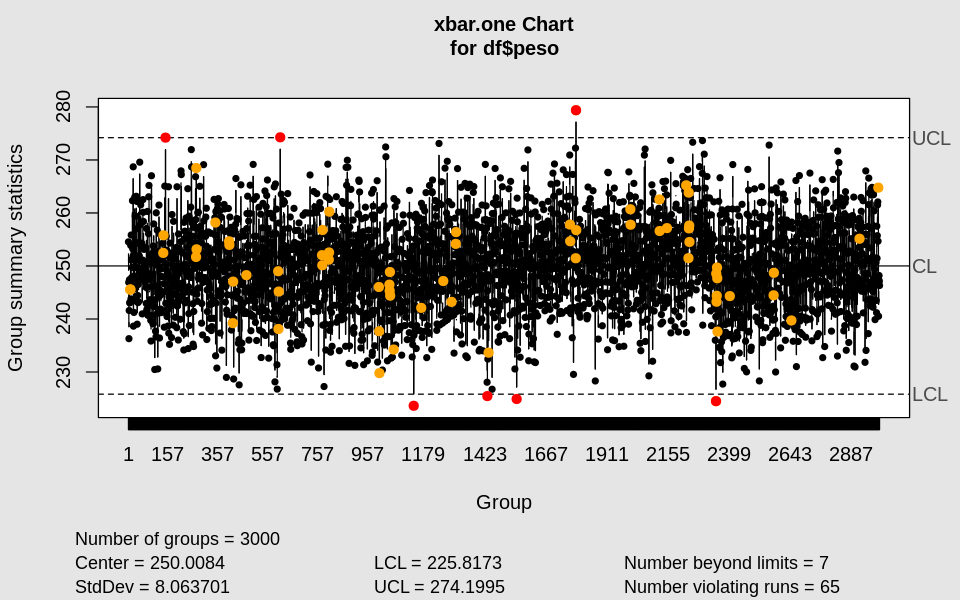

In [ ]:
install.packages("qcc")
library(qcc)
qcc(df$peso, type = "xbar.one")

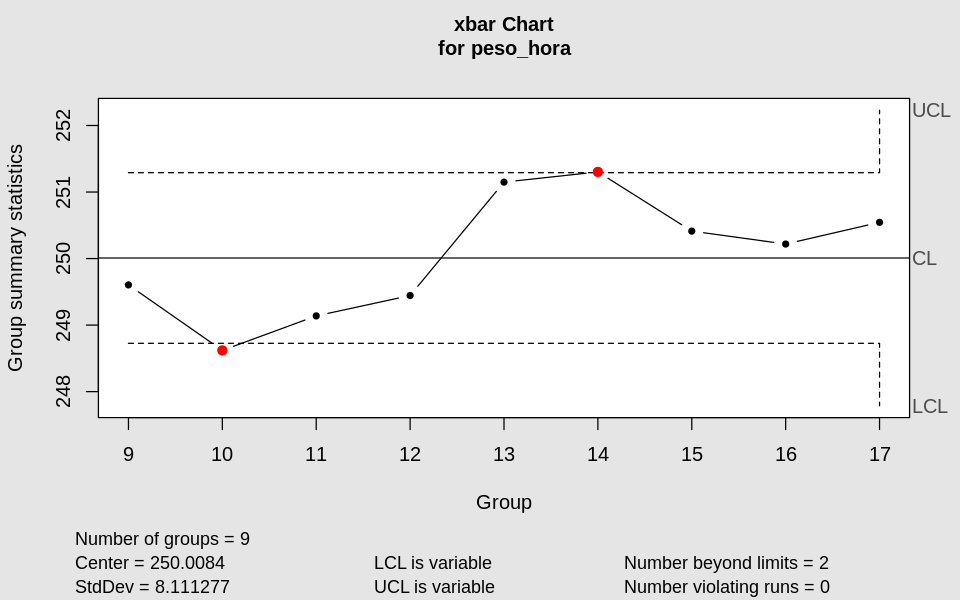

In [ ]:
peso_hora <- qcc.groups (df$peso, hour(df$fecha))
peso_grafico <- qcc(peso_hora, type = "xbar", nsigmas = 3)

In [ ]:
mean(df$peso[hour(df$fecha) < 13])

[1] 249.2016

In [ ]:
df |>
  filter(hour(fecha)>= 13) |>
  summarize( casos = n(), peso_medio = mean(peso))

casos,peso_medio
<int>,<dbl>
1560,250.7532


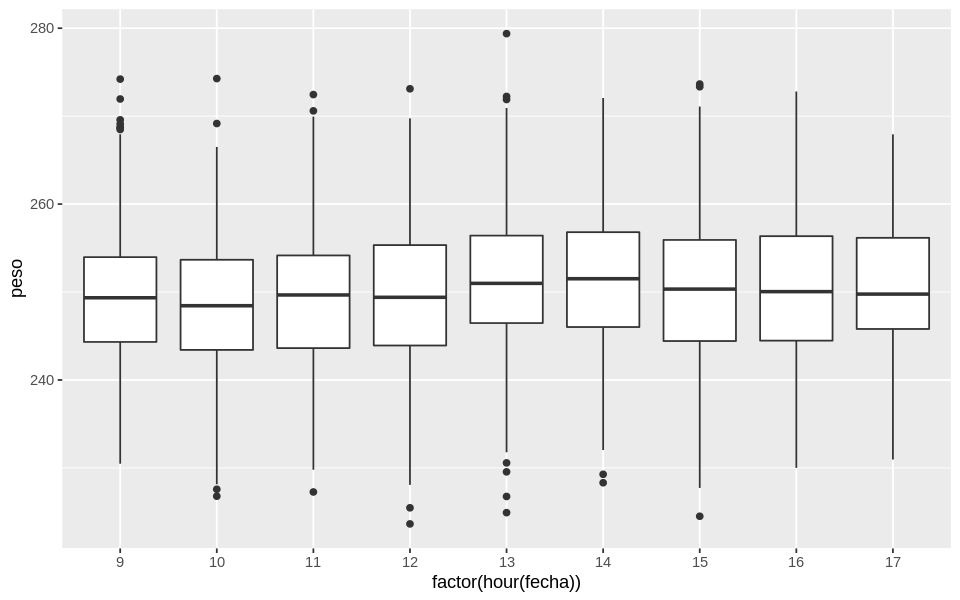

In [ ]:
df |>
  ggplot(aes(x=factor(hour(fecha)), y = peso)) +
  geom_boxplot()

List of 11
 $ call      : language qcc(data = peso_hora, type = "S")
 $ type      : chr "S"
 $ data.name : chr "peso_hora"
 $ data      : num [1:9, 1:360] 255 259 243 245 252 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics: Named num [1:9] 7.74 7.94 8.51 8.3 8.07 ...
  ..- attr(*, "names")= chr [1:9] "9" "10" "11" "12" ...
 $ sizes     : Named int [1:9] 360 360 360 360 360 360 360 360 120
  ..- attr(*, "names")= chr [1:9] "9" "10" "11" "12" ...
 $ center    : num 8.1
 $ std.dev   : num 8.1
 $ nsigmas   : num 3
 $ limits    : num [1:9, 1:2] 7.2 7.2 7.2 7.2 7.2 ...
  ..- attr(*, "dimnames")=List of 2
 $ violations:List of 2
 - attr(*, "class")= chr "qcc"

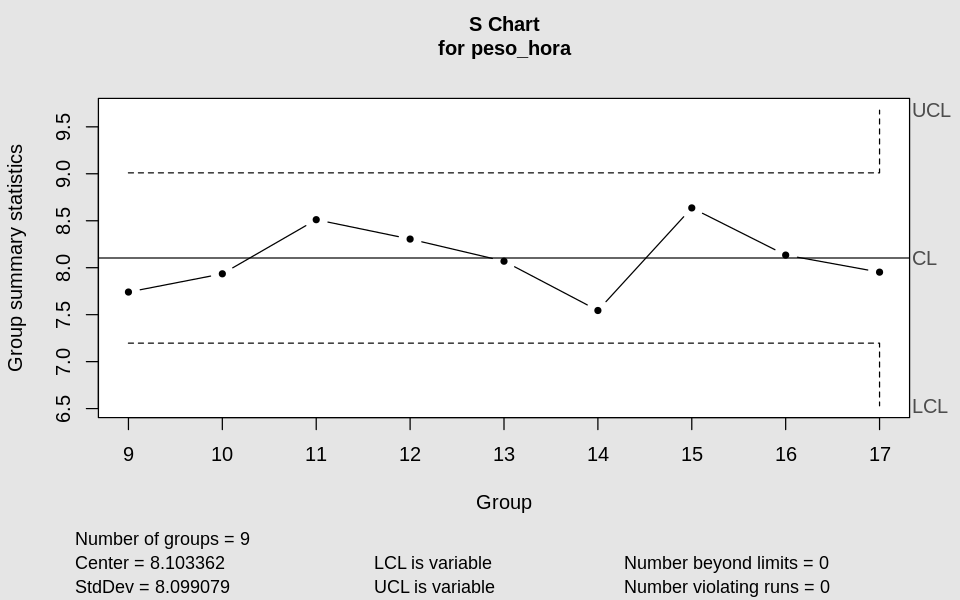

In [ ]:
qcc(peso_hora, type = "S")

In [ ]:
df |>
 group_by(hora = hour(fecha)) |>
 summarise(media=mean(peso), desv_t=sd(peso))

hora,media,desv_t
<int>,<dbl>,<dbl>
9,249.6041,7.740905
10,248.6196,7.935183
11,249.1381,8.511420
12,249.4445,8.304895
13,251.1493,8.069302
14,251.3026,7.544481
15,250.4124,8.636597
16,250.2182,8.134348
17,250.5447,7.952665


In [ ]:
str(peso_grafico)

List of 11
 $ call      : language qcc(data = peso_hora, type = "xbar", nsigmas = 3)
 $ type      : chr "xbar"
 $ data.name : chr "peso_hora"
 $ data      : num [1:9, 1:360] 255 259 243 245 252 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Group  : chr [1:9] "9" "10" "11" "12" ...
  .. ..$ Samples: NULL
 $ statistics: Named num [1:9] 250 249 249 249 251 ...
  ..- attr(*, "names")= chr [1:9] "9" "10" "11" "12" ...
 $ sizes     : Named int [1:9] 360 360 360 360 360 360 360 360 120
  ..- attr(*, "names")= chr [1:9] "9" "10" "11" "12" ...
 $ center    : num 250
 $ std.dev   : num 8.11
 $ nsigmas   : num 3
 $ limits    : num [1:9, 1:2] 249 249 249 249 249 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "" "" "" "" ...
  .. ..$ : chr [1:2] "LCL" "UCL"
 $ violations:List of 2
  ..$ beyond.limits : int [1:2] 6 2
  ..$ violating.runs: num(0) 
 - attr(*, "class")= chr "qcc"



Process Capability Analysis

Call:
process.capability(object = peso_grafico, spec.limits = c(232,     268))

Number of obs = 3000         Target = 250
       Center = 250             LSL = 232
       StdDev = 8.111           USL = 268

Capability indices:

       Value    2.5%   97.5%
Cp    0.7397  0.7210  0.7584
Cp_l  0.7401  0.7214  0.7587
Cp_u  0.7394  0.7207  0.7580
Cp_k  0.7394  0.7172  0.7616
Cpm   0.7397  0.7210  0.7584

Exp<LSL 1.3%	 Obs<LSL 1.3%
Exp>USL 1.3%	 Obs>USL 1.4%


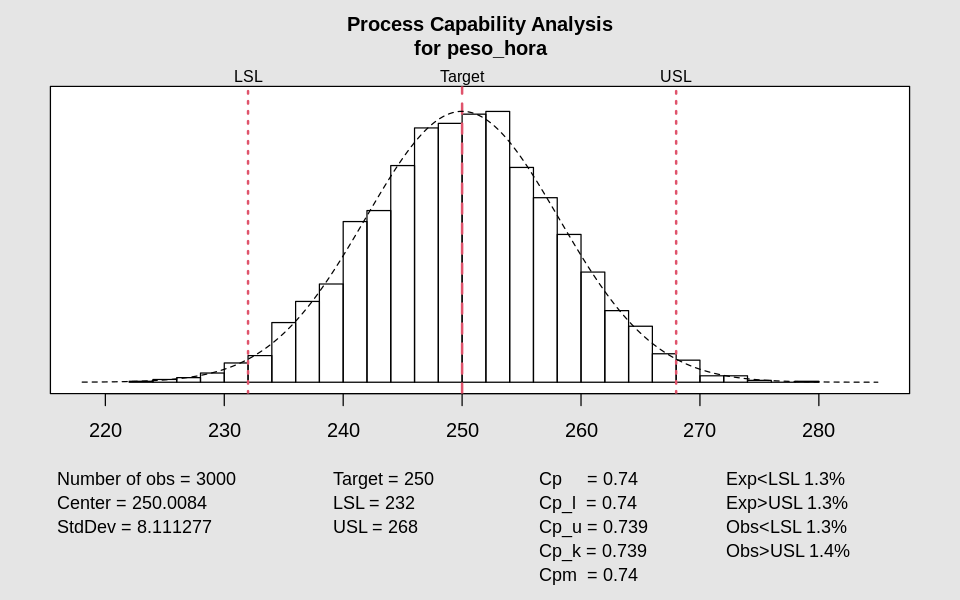

In [ ]:
process.capability(peso_grafico, spec.limits = c(232, 268)) # prob x < (2 * EMDT) debería ser 0%


Process Capability Analysis

Call:
process.capability(object = peso_grafico, spec.limits = c(241,     259))

Number of obs = 3000         Target = 250
       Center = 250             LSL = 241
       StdDev = 8.111           USL = 259

Capability indices:

       Value    2.5%   97.5%
Cp    0.3699  0.3605  0.3792
Cp_l  0.3702  0.3575  0.3829
Cp_u  0.3695  0.3568  0.3822
Cp_k  0.3695  0.3544  0.3847
Cpm   0.3699  0.3605  0.3792

Exp<LSL 13%	 Obs<LSL 13%
Exp>USL 13%	 Obs>USL 14%


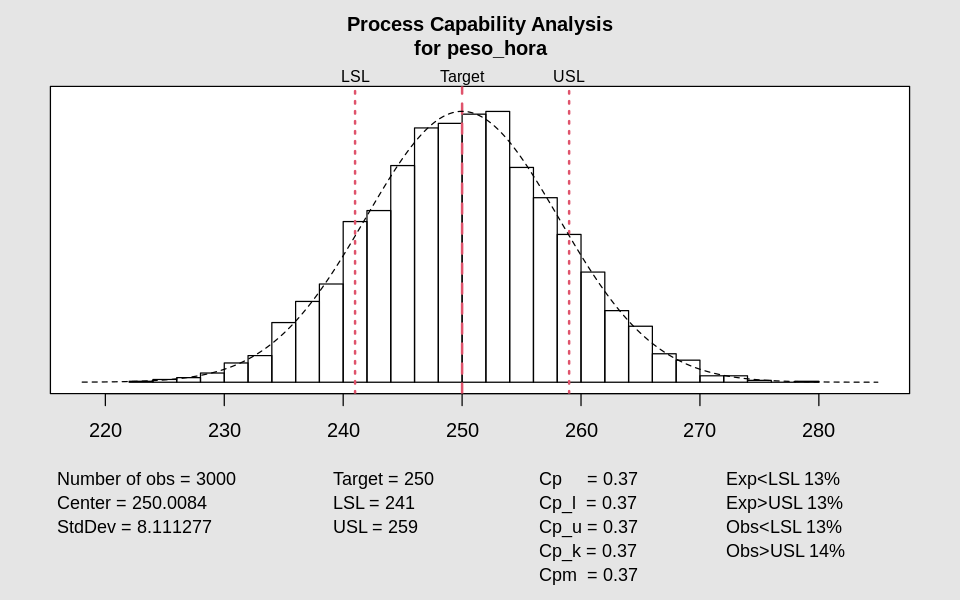

In [ ]:
process.capability(peso_grafico, spec.limits = c(241, 259)) # prob x < (1 * EMDT) debería ser menor del 7%

## Plan de mejora: dispersión objetivo y peso a dosificar

In [ ]:
incremento_peso <- 232 - min(df$peso) + 1 # añadimos un margen de confianza como seguridad
df$peso2 <- df$peso + incremento_peso

In [ ]:
mean(df$peso2)

[1] 259.3784

In [ ]:
sd(df$peso2)

[1] 8.147409

In [ ]:
summary(df$peso2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  233.0   253.8   259.4   259.4   264.9   288.8 

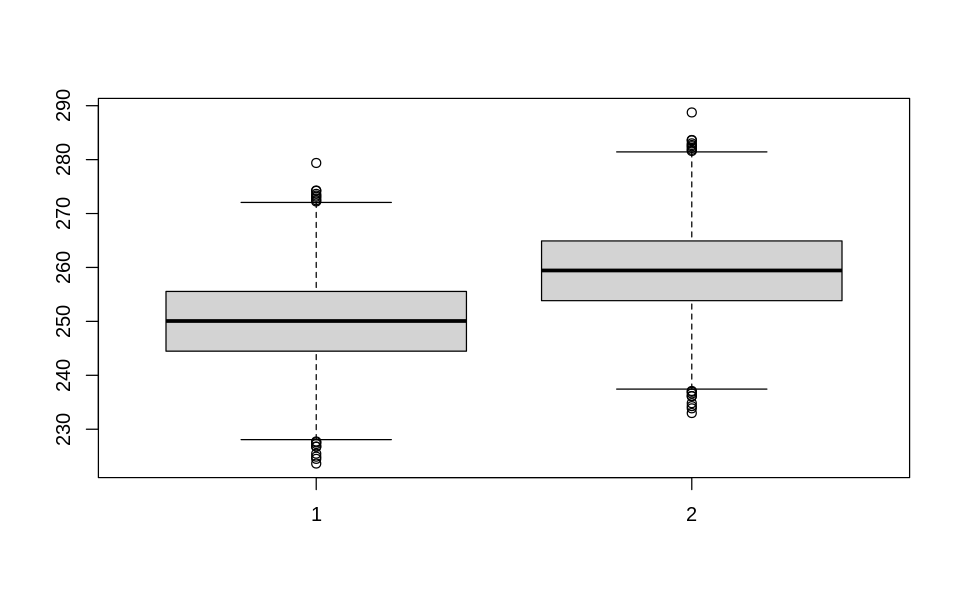

In [ ]:
boxplot(df$peso, df$peso2)

In [ ]:
head(df)

,peso,fecha,peso2
,<dbl>,<dttm>,<dbl>
1,254.55,2020-05-16 09:00:00,263.92
2,246.92,2020-05-16 09:00:00,256.29
3,236.29,2020-05-16 09:00:00,245.66
4,241.60,2020-05-16 09:00:00,250.97
5,247.41,2020-05-16 09:00:00,256.78
6,243.03,2020-05-16 09:00:00,252.40


In [ ]:
df |>
    pivot_longer(cols = c(peso,peso2), names_to = "caso", values_to = "peso") |>
    head()

fecha,caso,peso
<dttm>,<chr>,<dbl>
2020-05-16 09:00:00,peso,254.55
2020-05-16 09:00:00,peso2,263.92
2020-05-16 09:00:00,peso,246.92
2020-05-16 09:00:00,peso2,256.29
2020-05-16 09:00:00,peso,236.29
2020-05-16 09:00:00,peso2,245.66


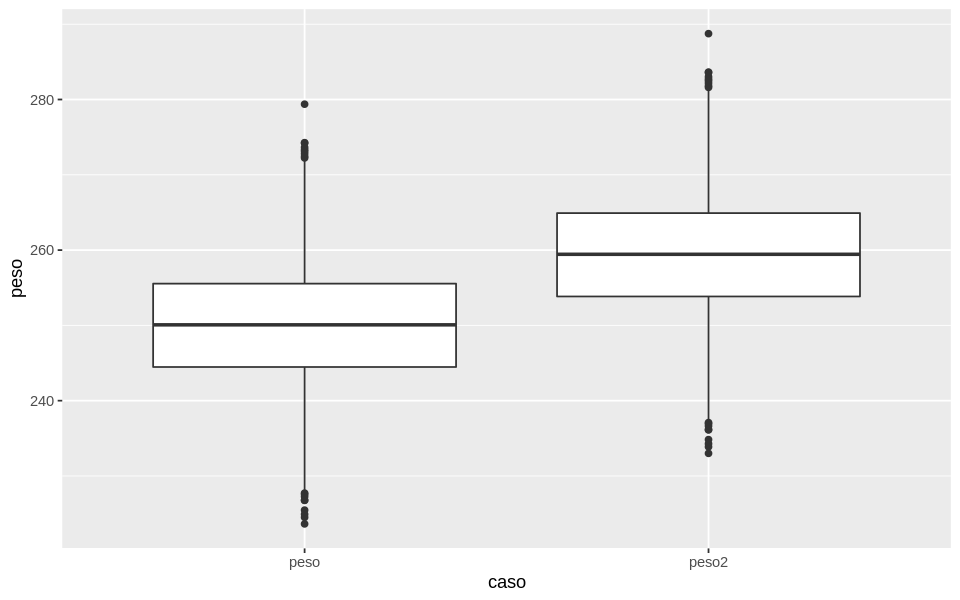

In [ ]:
df |>
    pivot_longer(cols = c(peso,peso2), names_to = "caso", values_to = "peso") |>
    ggplot(aes(x = caso, y = peso))+
      geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



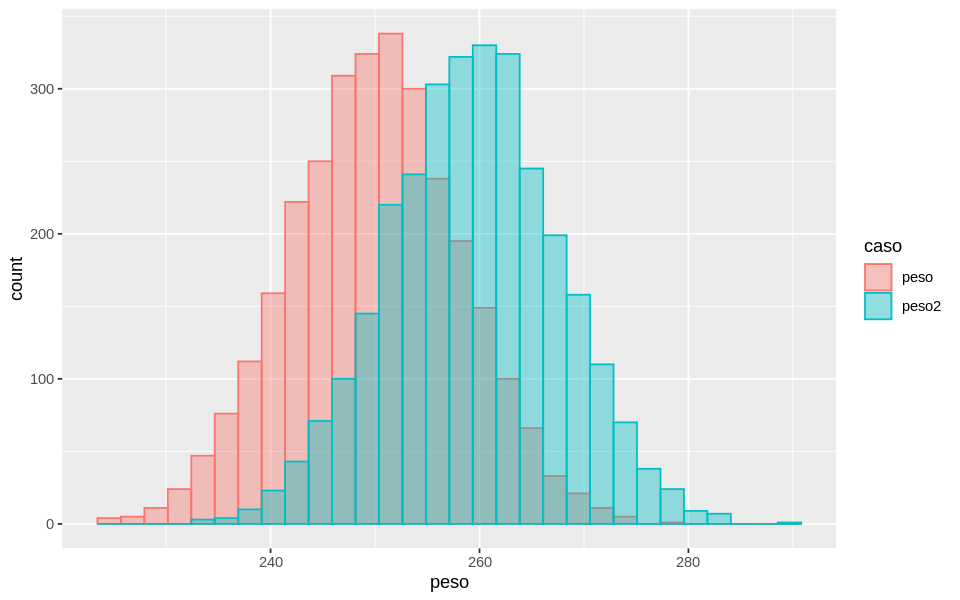

In [ ]:
df |>
    pivot_longer(cols = c(peso,peso2), names_to = "caso", values_to = "peso") |>
    ggplot(aes(x = peso, colour= caso,  fill = caso))+
      geom_histogram(position = "identity", alpha = 0.4) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



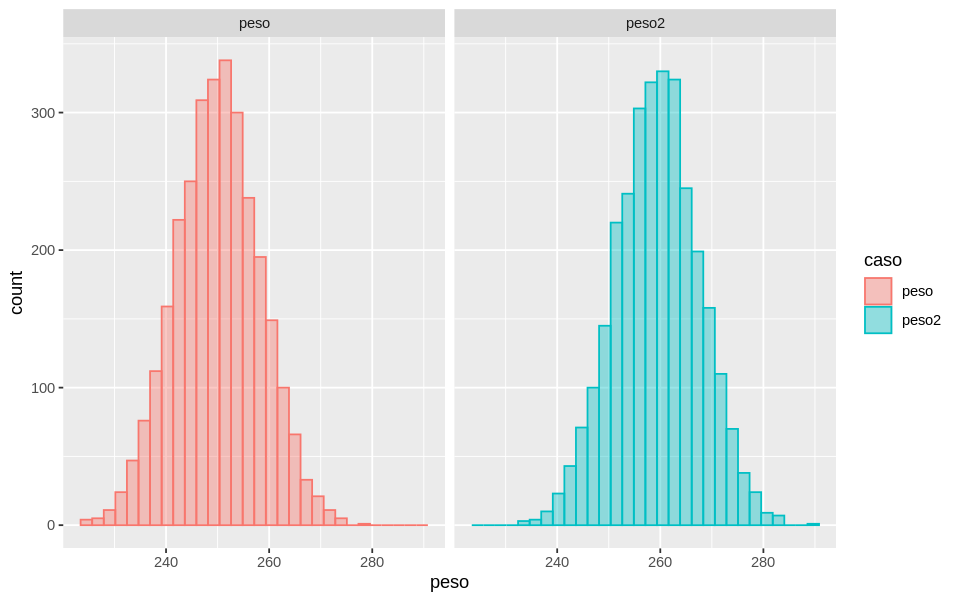

In [ ]:
df |>
    pivot_longer(cols = c(peso,peso2), names_to = "caso", values_to = "peso") |>
    ggplot(aes(x = peso, colour = caso,  fill = caso))+
      geom_histogram(alpha = 0.4) +
      facet_wrap(~caso)

In [ ]:
sum(df$peso2<=232)

[1] 0

In [ ]:
sum(df$peso2 <= 241)

[1] 34

In [ ]:
pct_deficientes <- sum(df$peso2 < 241) / length(df$peso2) *100
pct_deficientes

[1] 1.1

## Análisis económico

In [ ]:
peso_real <- sum(df$peso) /1000
peso_real

[1] 750.0253

In [ ]:
peso_simul <- sum(df$peso2) /1000
peso_simul

[1] 778.1353

In [ ]:
peso_mas <- peso_simul - peso_real
coste_unitario <- 0.85
coste_total2 <- peso_mas * coste_unitario
coste_total2

[1] 23.8935

## Un plan de ahorro

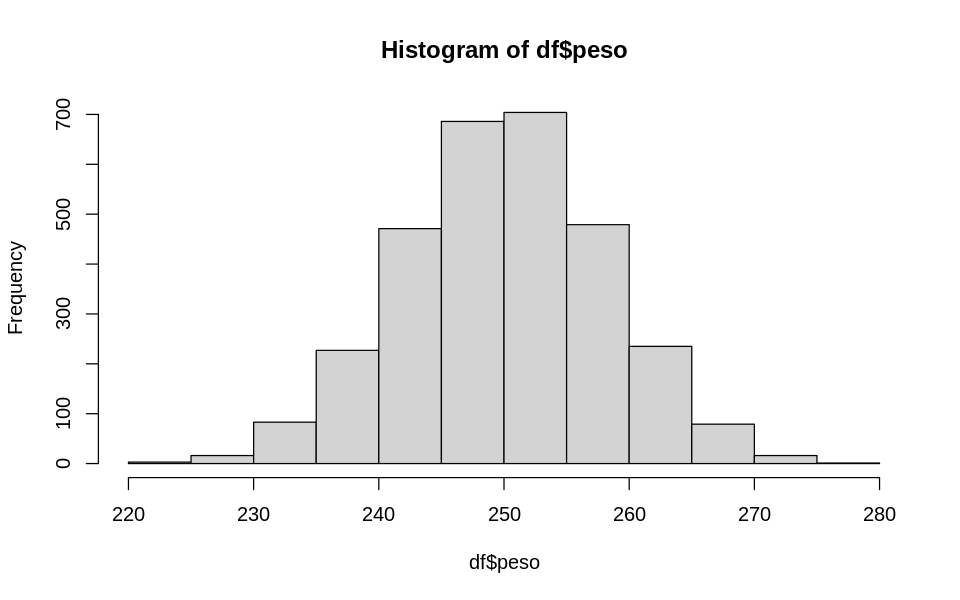

In [ ]:
 h <- hist(df$peso)

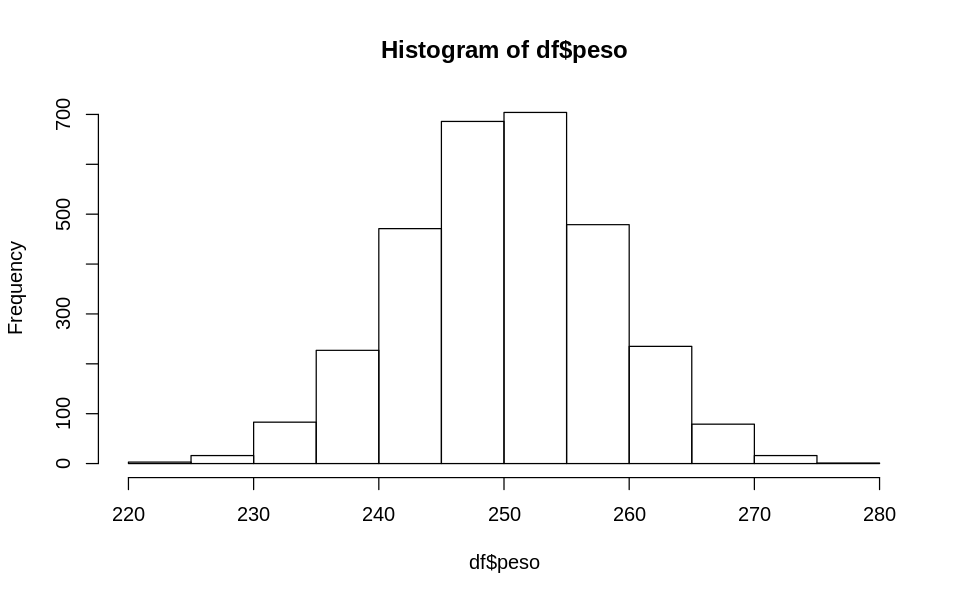

In [ ]:
plot(h)

In [ ]:
str(h)

List of 6
 $ breaks  : int [1:13] 220 225 230 235 240 245 250 255 260 265 ...
 $ counts  : int [1:12] 3 16 83 227 471 686 704 479 235 79 ...
 $ density : num [1:12] 0.0002 0.00107 0.00553 0.01513 0.0314 ...
 $ mids    : num [1:12] 222 228 232 238 242 ...
 $ xname   : chr "df$peso"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


In [ ]:
h$breaks 
h$mids

[1] 220 225 230 235 240 245 250 255 260 265 270 275 280

[1] 222.5 227.5 232.5 237.5 242.5 247.5 252.5 257.5 262.5 267.5 272.5 277.5

In [ ]:
df |>
  mutate (intervalo = cut(peso, c(0,232,241,250,max(peso)))) |>
  group_by(intervalo) |>
  summarize (frecuencia = n()) |>
  mutate(frecuencia_relativa = round(frecuencia/ sum(frecuencia) * 100,2))

intervalo,frecuencia,frecuencia_relativa
<fct>,<int>,<dbl>
"(0,232]",40,1.33
"(232,241]",359,11.97
"(241,250]",1087,36.23
"(250,279]",1514,50.47


In [ ]:
df |>
  mutate (intervalo = cut(peso2, c(0,232,241,250,max(peso)))) |>
  group_by(intervalo) |>
  summarize (frecuencia = n()) |>
  mutate(frecuencia_relativa = round(frecuencia/ sum(frecuencia) * 100,2))

intervalo,frecuencia,frecuencia_relativa
<fct>,<int>,<dbl>
"(232,241]",34,1.13
"(241,250]",343,11.43
"(250,279]",2606,86.87
NA,17,0.57


In [ ]:
p1 <- pnorm(232, mean(df$peso), sd(df$peso))
p1

[1] 0.01354124

In [ ]:
p2 <- pnorm(241, mean(df$peso), sd(df$peso))
p2

[1] 0.1344323

In [ ]:
p1 <- pnorm(232, mean(df$peso2), sd(df$peso2)) * length(df$peso2)
p2 <- pnorm(241, mean(df$peso2), sd(df$peso2)) * length(df$peso2)
p1
p2

[1] 1.167505

[1] 36.13036

In [ ]:
df$peso3 <- rnorm (3000, mean(df$peso2), 6)

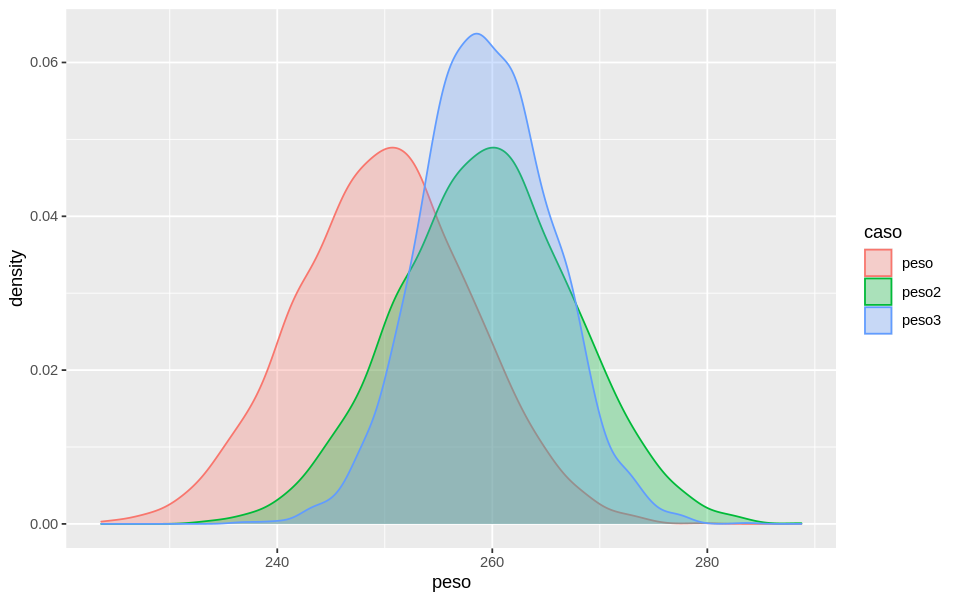

In [ ]:
df |>
    pivot_longer(cols = c(peso,peso2, peso3), names_to = "caso", values_to = "peso") |>
    ggplot(aes(x = peso, colour= caso,  fill = caso))+
      geom_density(alpha = 0.3) 

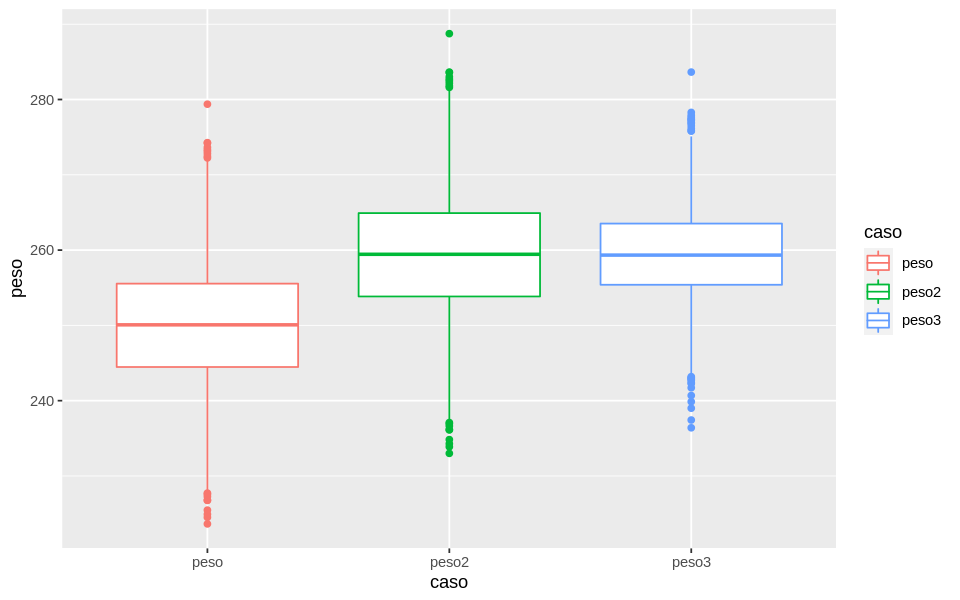

In [ ]:
df |>
    pivot_longer(cols = c(peso,peso2, peso3), names_to = "caso", values_to = "peso") |>
    ggplot(aes(y = peso, x= caso, colour = caso))+
      geom_boxplot() 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




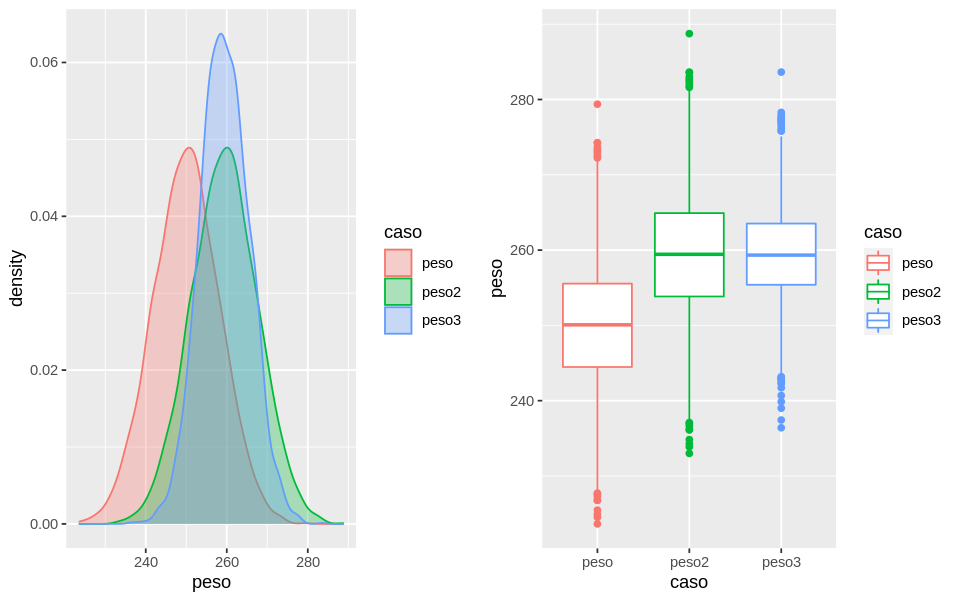

In [ ]:
install.packages("gridExtra")
library(gridExtra)

df2 <- df |>
    select(peso,peso2, peso3) |>
    pivot_longer(cols = c(peso,peso2,peso3), names_to = "caso", values_to = "peso")

graf1 <- ggplot(df2, aes(x = peso, colour = caso, fill = caso)) +
        geom_density(alpha=0.3)

df2 <- df |>
    select(peso,peso2, peso3) |>
    pivot_longer(cols = c(peso,peso2, peso3), names_to = "caso", values_to = "peso")

graf2 <- ggplot(df2, aes(x = caso, y = peso, colour = caso)) +
        geom_boxplot()

gridExtra::grid.arrange(graf1, graf2, ncol=2)

In [ ]:
df$peso3 <- rnorm (3000, mean(df$peso2)-4, 6)

In [ ]:
sum(df$peso3 <= 232)

[1] 0

In [ ]:
pnorm(232, mean(df$peso3), 6 )

[1] 4.454965e-05

In [ ]:
sum(df$peso3 <= 241)

[1] 27

In [ ]:
pnorm(241, mean(df$peso3), 6 ) * length(df$peso3)

[1] 23.37654

In [ ]:
df |>
  select(peso,peso2, peso3) |>
  pivot_longer(cols = c(peso,peso2,peso3), names_to = "caso", values_to = "peso") |>
  group_by(caso) |>
  summarize (peso_medio = mean(peso), desv_t = sd(peso))

caso,peso_medio,desv_t
<chr>,<dbl>,<dbl>
peso,250.0084,8.147409
peso2,259.3784,8.147409
peso3,255.5110,5.953063


In [ ]:
peso_simul2 <- sum(df$peso3) /1000
peso_mas <- abs(peso_simul2 - peso_simul)
coste_unitario <- 0.85
coste_total3 <- peso_mas * coste_unitario
coste_total3

[1] 9.861863

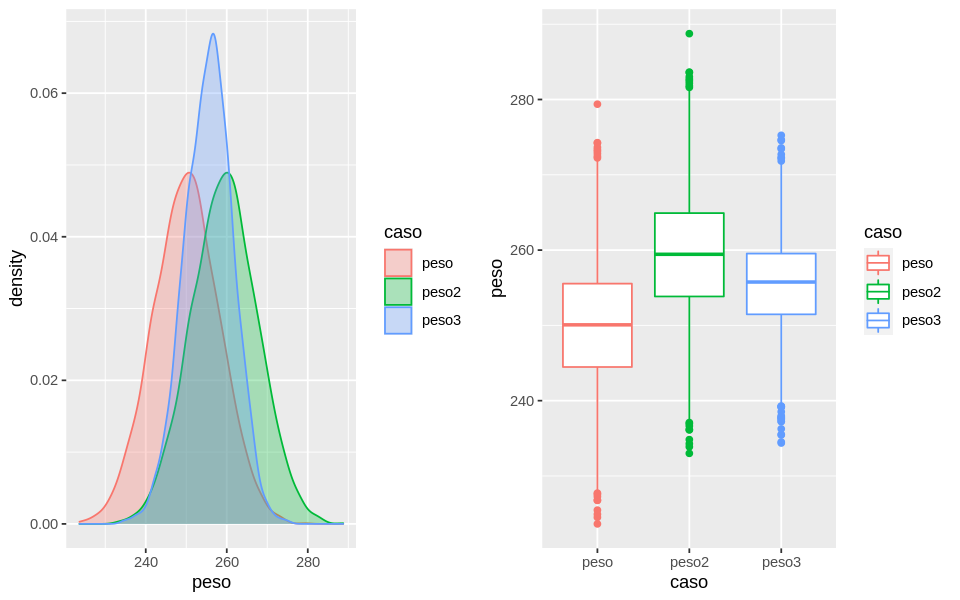

In [ ]:
df2 <- df |>
    select(peso,peso2, peso3) |>
    pivot_longer(cols = c(peso,peso2,peso3), names_to = "caso", values_to = "peso")

graf1 <- ggplot(df2, aes(x = peso, colour = caso, fill = caso)) +
        geom_density(alpha=0.3)

df2 <- df |>
    select(peso,peso2, peso3) |>
    pivot_longer(cols = c(peso,peso2, peso3), names_to = "caso", values_to = "peso")

graf2 <- ggplot(df2, aes(x = caso, y = peso, colour = caso)) +
        geom_boxplot()

gridExtra::grid.arrange(graf1, graf2, ncol=2)